In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from keras.utils import image_dataset_from_directory
# Directories
train_dirs = [
    '/content/drive/MyDrive/ProjetoIA/dataset/train1',
    '/content/drive/MyDrive/ProjetoIA/dataset/train2',
    '/content/drive/MyDrive/ProjetoIA/dataset/train4',
    '/content/drive/MyDrive/ProjetoIA/dataset/train5'
]
validation_dir = '/content/drive/MyDrive/ProjetoIA/dataset/train3'
test_dir = '/content/drive/MyDrive/ProjetoIA/dataset/test'

# Parameters
IMG_SIZE = 150
BATCH_SIZE = 32

# Function to load datasets from multiple directories and concatenate them
def load_and_concatenate_datasets(directories, img_size, batch_size):
    datasets = []
    for directory in directories:
        dataset = image_dataset_from_directory(
            directory,
            image_size=(img_size, img_size),
            batch_size=batch_size
        )
        datasets.append(dataset)
    return datasets

# Load train datasets and concatenate
train_datasets = load_and_concatenate_datasets(train_dirs, IMG_SIZE, BATCH_SIZE)
train_dataset = tf.data.Dataset.sample_from_datasets(train_datasets)

# Load validation and test datasets
validation_dataset = image_dataset_from_directory(
    validation_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

# Extract class names from one of the datasets
example_dataset = image_dataset_from_directory(
    train_dirs[0],
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)
class_names = example_dataset.class_names
print(class_names)

Found 10400 files belonging to 10 classes.
Found 9600 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 1 classes.
Found 10400 files belonging to 10 classes.
['000_airplane', '001_automobile', '002_bird', '003_cat', '004_deer', '005_dog', '006_frog', '007_horse', '008_ship', '009_truck']


In [ ]:
#The shape of each batch

for data_batch, labels_batch in train_dataset:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (32, 150, 150, 3)
labels batch shape: (32,)


In [ ]:
#Creating the neural network
from tensorflow import keras
from keras import layers
from keras import models
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                        

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint_callback = ModelCheckpoint(filepath='/content/drive/MyDrive/ProjetoIA/models/modelS_2_best.h5',
                                      monitor='val_loss',
                                      save_best_only=True,
                                      save_weights_only=False,
                                      verbose=1)

early_stopping_callback = EarlyStopping(monitor='val_loss',
                                        patience=5,
                                        verbose=1)

In [ ]:
import tensorflow as tf
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Training the model
#history guarda todos os parametros gerados durante o treino
history = model.fit(
  train_dataset,
  epochs=50,
  validation_data=validation_dataset,# n usa para melhorar so para mostrar ao utilizador
  callbacks=[checkpoint_callback, early_stopping_callback]
  )

Epoch 1/50
   1251/Unknown - 1205s 960ms/step - loss: 1.7948 - accuracy: 0.3425
Epoch 1: val_loss improved from inf to 1.50047, saving model to /content/drive/MyDrive/ProjetoIA/models/modelS_2_best.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1251/1251 [==============================] - 1582s 1s/step - loss: 1.7948 - accuracy: 0.3425 - val_loss: 1.5005 - val_accuracy: 0.4568
Epoch 2/50
1251/1251 [==============================] - ETA: 0s - loss: 1.4521 - accuracy: 0.4764
Epoch 2: val_loss improved from 1.50047 to 1.40763, saving model to /content/drive/MyDrive/ProjetoIA/models/modelS_2_best.h5
1251/1251 [==============================] - 66s 53ms/step - loss: 1.4521 - accuracy: 0.4764 - val_loss: 1.4076 - val_accuracy: 0.4989
Epoch 3/50
1249/1251 [============================>.] - ETA: 0s - loss: 1.3110 - accuracy: 0.5354
Epoch 3: val_loss improved from 1.40763 to 1.24342, saving model to /content/drive/MyDrive/ProjetoIA/models/modelS_2_best.h5
1251/1251 [==============================] - 66s 52ms/step - loss: 1.3109 - accuracy: 0.5354 - val_loss: 1.2434 - val_accuracy: 0.5639
Epoch 4/50
1250/1251 [============================>.] - ETA: 0s - loss: 1.2126 - accuracy: 0.5735
Epoch 4: val_loss improved from 1.24342 to 1.19051,

In [ ]:
#Loading IF NESCESARY
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/ProjetoIA/models/modelS_2_best.h5')


313/313 [==============================] - 65s 207ms/step - loss: 1.5914 - accuracy: 0.6758
val_acc: 0.6758000254631042


In [ ]:
#and testing the model
val_loss, val_acc = model.evaluate(validation_dataset)
print('val_acc:', val_acc)

313/313 [==============================] - 13s 41ms/step - loss: 1.0342 - accuracy: 0.6717
val_acc: 0.6717000007629395


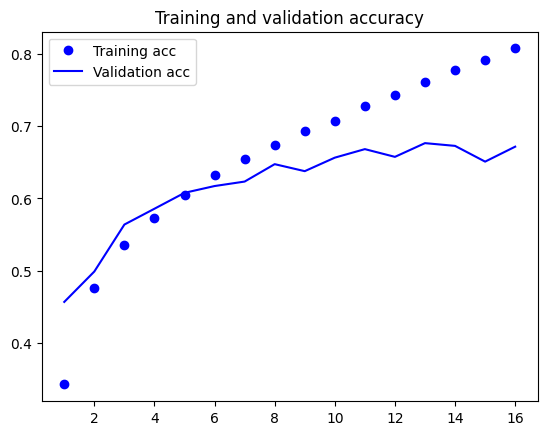

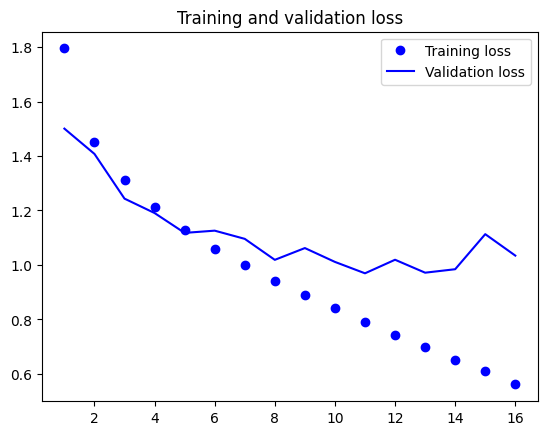

In [ ]:
#Displaying curves of loss and accuracy

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()